In [18]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

#用sklearn自带的莺尾花数据集
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns=['sepal length','sepal width','petal length','petal width','label']
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


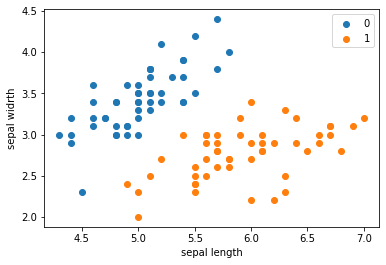

In [32]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal widrth')
plt.legend()

In [24]:
import numpy as np

class My_Perceptron_Model:
    #选取初值 w,b
    def __init__(self, data):
        self.data = data
        self.w = np.ones(len(self.data[0])-1, dtype=np.float32)
        self.b = 0
        self.lr = 0.1 # 随机梯度下降学习率
        
    #sign函数
    def sign(self, X, w, b):
        y = np.dot(X,w) + b #1XN * N*1 = 1X1
        return y
    
    #随机梯度下降算法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for i in range(len(X_train)):
                X = X_train[i] #NX1
                y = y_train[i] #1X1
                if y*self.sign(X, self.w, self.b)<= 0:
                    self.w = self.w + self.lr*np.dot(y, X) #NX1
                    self.b = self.b + self.lr*y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return
    
    def score(self):
        pass          

[  7.8 -10. ]
-12.099999999999973


<ipython-input-46-1f73d2c17cb4>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
<ipython-input-46-1f73d2c17cb4>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')


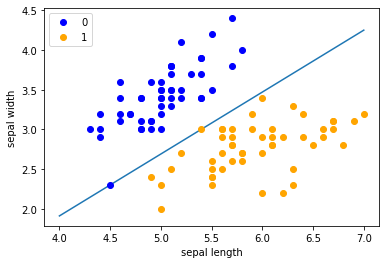

In [46]:
data = np.array(df.iloc[:100, [0,1,-1]])
data.shape
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i ==1 else -1 for i in y])
perceptron = My_Perceptron_Model(data)
perceptron.fit(X, y)
print(perceptron.w)
print(perceptron.b)
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [49]:
#使用sklearn实现感知机
from sklearn.linear_model import Perceptron

#定义感知机
clf = Perceptron()
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)

[[ 23.2 -38.7]]
[-5.]


<ipython-input-50-6f110df8fc37>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
<ipython-input-50-6f110df8fc37>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')


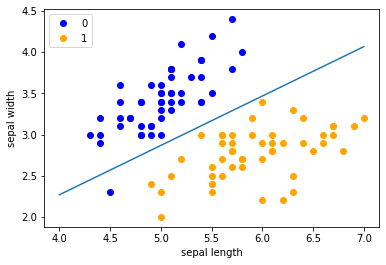

In [50]:
x_points = np.linspace(4, 7, 10)
y_ = -(clf.coef_[-1][0] * x_points + clf.intercept_[0]) / clf.coef_[-1][1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [51]:
acc = clf.score(X, y)
print(acc)

0.99
